In [ ]:
import json
import pandas as pd
from flatten_json import flatten
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from wordcloud import WordCloud
from xgboost import XGBClassifier
%matplotlib inline

In [19]:
articles = open('scraped_articles.json', 'r')

In [20]:
blacklist = [
  "nbpostgazette.com",
  "www.ratingsalerts.com",
  "theanalystfinancial.com",
  "marketingcorrect.com",
  "dailytelescope.com",
  "nbherard.com",
  "financialportal24.com",
  "reportagestuff.com",
  "www.insidertradings.org",
  "silverpinyon.com",
  "timegazette.com",
  "www.satprnews.com",
  "monotonecritic.com",
  "marketnewsaccess.com",
  "firstnewsservice.com",
  "yourniskayuna24.com",
  "nwctrail.com",
  "ibnservice.com",
  "incrediblenews24.com",
  "publicsector24.com",
  "firstnewshawk.com",
  "journalismday.com",
  "www.highlandmirror.com",
  "thetricountypress.com",
  "assetsstock.com",
  "chiefobserver.com",
  "opinioninvestor.com",
  "freenewsman.com",
  "talkherald.com",
  "publicistreport.com",
  "newmexicocourierexpress.com",
  "peopletoday24.com",
  "dailycommercenews.com",
  "factsweek.com",
  "thefuturetechnologies.com",
  "newschemicals.com",
  "thefinancialconsulting.com",
  "islandpostgazette.com",
  "therealfact24.com",
  "thefuturetechnologies.com",
  "perfectanalyst.com",
  "positivenewspaper.com",
  "www.findmarketresearch.org",
  "talkdailynews.com",
  "ittechnology24.com",
  "heraldanalyst.com",
  "tokenfolks.com",
  "theanalystfinancial.com",
  "truthfulreporter.com",
]

In [21]:
def isspam(link):
    
    spam = 0
    for x in blacklist:
        if link.find(x)!= -1:
            spam =1
    return spam
        
    

In [22]:
data = json.load(articles)

In [23]:
col1_l,col2_l,col3_l,col4_l,col5_l,label = [],[],[],[],[],[]

In [24]:
for col1 in data.keys():
    for col2 in data[col1].keys():
        for col3 in data[col1][col2].keys():
            for col4 in data[col1][col2][col3]:
                for article in data[col1][col2]['articles']:
                    col1_l.append(article['link'])
                    col2_l.append(article['published'])
                    col3_l.append(article['title'])
                    col4_l.append(article['text'])
                    col5_l.append(article['author'])
                    label.append(isspam(article['link']))

                #col4_l.append(data[col1][col2][col3])
                

In [25]:
data=pd.DataFrame([col1_l,col2_l,col3_l,col4_l,col5_l,label]).T

In [26]:
data.columns =['link','published','title','text','author','label']

In [27]:
data.head()

,link,published,title,text,author,label
0,https://www.nytimes.com/2018/03/24/technology/...,2018-03-24T20:43:21,How Calls for Privacy May Upend Business for F...,"There are other avenues still, said Jascha Kay...","[David Streitfeld, Natasha Singer, Steven Erla...",0
1,https://www.nytimes.com/2018/03/24/business/we...,2018-03-24T17:16:53,The Former Khmer Rouge Slave Who Blew the Whis...,"And so Mr. Tran, who is in his mid-50s and spe...",[Emily Flitter],0
2,https://www.nytimes.com/2018/03/25/business/ch...,2018-03-25T15:21:56,"China Splits Top Jobs at Central Bank, Adding ...","In that analogy, Mr. Guo will essentially beco...",[Keith Bradsher],0
3,https://www.nytimes.com/2018/03/24/business/jo...,2018-03-25T03:00:18,A Top Candidate for New York Fed’s Leader: San...,News of Mr. Williams’s likely selection was fi...,[Ben Casselman],0
4,https://www.nytimes.com/2018/03/24/business/tr...,2018-03-24T14:34:10,"Trump’s Tariffs Keep Allies, Markets and Indus...",What is increasingly clear to many on Capitol ...,[Jim Tankersley],0


In [29]:
data['label'].value_counts()

0    53691
1    15832
Name: label, dtype: int64

In [30]:
df = data

In [31]:
df.drop(['link','published','title','author'],axis = 1,inplace=True)

In [32]:
df.rename({'text':'data','label':'labels'},axis=1,inplace=True)

In [33]:
df.labels = df.labels.astype(int)

In [34]:
Y = df['labels'].values

In [35]:
count_vectorizer = CountVectorizer(decode_error='ignore')

In [36]:
X = df['data']

In [37]:
# split up the data
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.33)

In [38]:
Xtrain  =count_vectorizer.fit_transform(Xtrain)

In [39]:
Xtrain.shape

(46580, 22219)

In [40]:
Xtest = count_vectorizer.transform(Xtest)

In [41]:
# create the model, train it, print scores
model = MultinomialNB()

In [42]:
model.fit(Xtrain, Ytrain)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [43]:
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))


train score: 0.9985616144267926
test score: 0.9982565488384256


In [44]:
Ypred = model.predict(Xtest)

In [45]:
confusion_matrix(Ypred,Ytest)

array([[17797,    40],
       [    0,  5106]], dtype=int64)

In [46]:
rf = RandomForestClassifier(n_estimators=500)

In [47]:
rf.fit(Xtrain,Ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [48]:
Ypred = rf.predict(Xtest)

In [49]:
confusion_matrix(Ypred,Ytest)

array([[17797,     0],
       [    0,  5146]], dtype=int64)

In [50]:
# visualize the data
def visualize(label):
  words = ''
  for news in df[df['labels'] == label]['data']:
    news = news.lower()
    words += news + ' '
  wordcloud = WordCloud(width=3600, height=2400).generate(words)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()
  plt.savefig('spam_words.jpg')

In [51]:
# see what we're getting wrong
df['predictions'] = model.predict(count_vectorizer.transform(X))

In [52]:
# things that should be spam
sneaky_spam = df[(df['predictions'] == 0) & (df['labels'] == 1)]['data']
for msg in sneaky_spam:
  print(msg)

Two major campaigns are running now on Go Fund Me ‘Save Toys ‘R’ Us’ and “Donate to Alcohol Substitute’’

Do you now that every 15 minutes someone in the United States is killed or seriously injured in an alcohol relating incident?

Think twice before drinking as the consequences could be disastrous for your kids and family members.

When a Child Loses a Parent?

But what happens when a child loses one or both parents before reaching adulthood? Along with the inevitable problems dealing with grief and loss, can being deprived of a parent at an early age affect the kind of intimate relationships children form after becoming adults?

1. Your child will have experienced trauma.

2. Your child will not have a sense of permanency.

3. Your child will not have an idea of what to do with free time.

4. Your child has learned great survival skills, but not great family skills.

5. Your child has learned that he or she can only depend on him- or herself.

6. Your child may have suffered abuse o

In [53]:
# things that should not be spam
not_actually_spam = df[(df['predictions'] == 1) & (df['labels'] == 0)]['data']
for msg in not_actually_spam:
  print(msg)

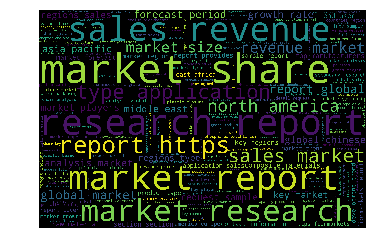

<Figure size 432x288 with 0 Axes>

In [54]:
visualize(1) #Spam

In [ ]:
visualize(0) #ham